In [6]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn import tree

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import statsmodels.api as sm

import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("hdb-resale-flat-prices.csv")

df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135568 entries, 0 to 135567
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                135568 non-null  object 
 1   town                 135568 non-null  object 
 2   flat_type            135568 non-null  object 
 3   block                135568 non-null  object 
 4   street_name          135568 non-null  object 
 5   storey_range         135568 non-null  object 
 6   floor_area_sqm       135568 non-null  float64
 7   flat_model           135568 non-null  object 
 8   lease_commence_date  135568 non-null  int64  
 9   remaining_lease      135568 non-null  object 
 10  resale_price         135568 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 11.4+ MB


In [9]:
df['resale_price'].mean()

471617.1706447687

##Data visualisation

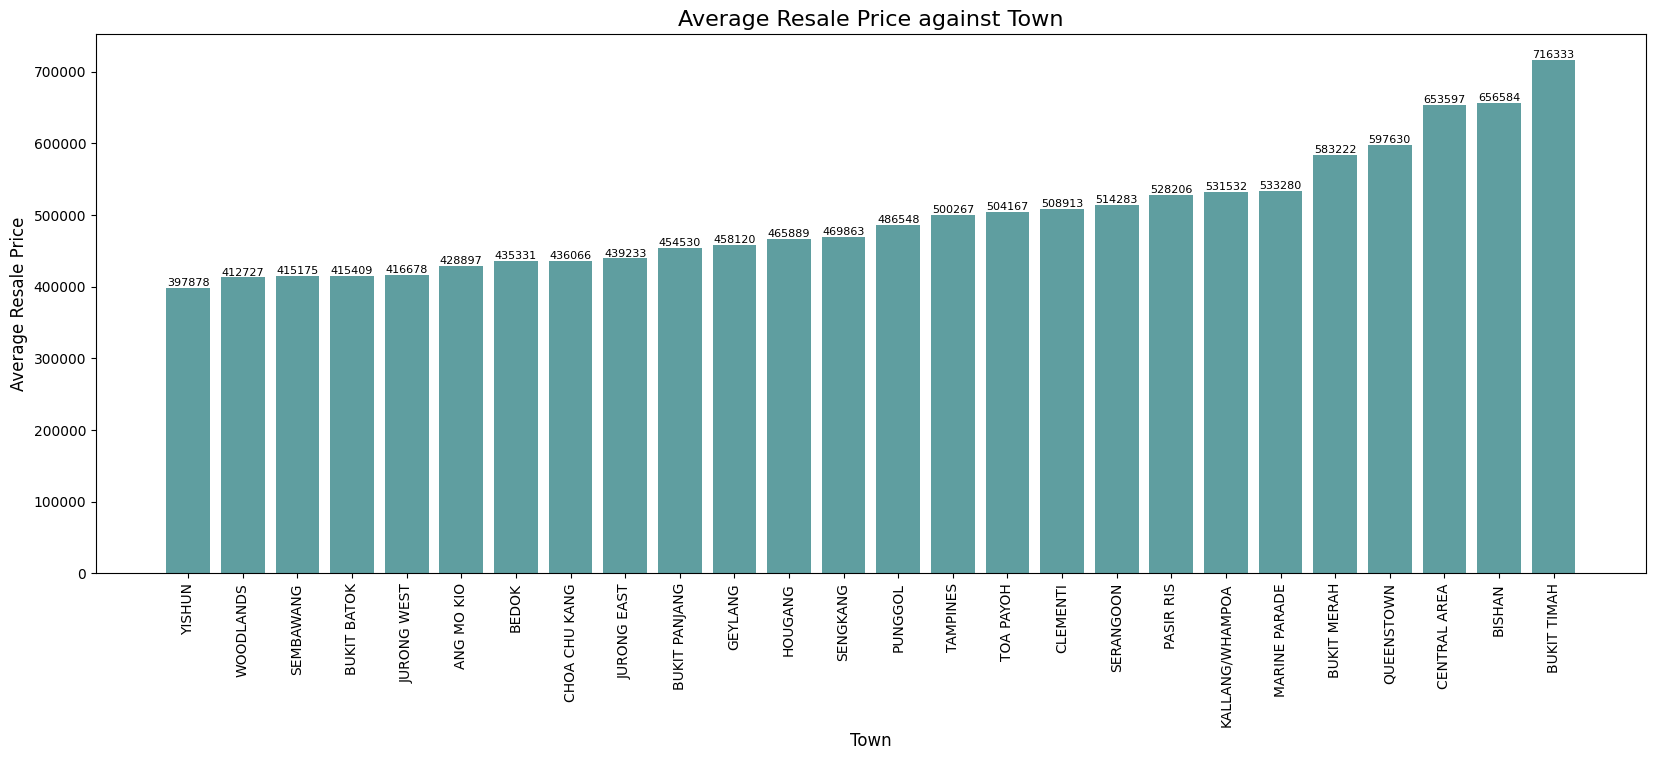

In [10]:
town_labels = sorted(df["town"].unique().tolist())
town_count = []
town_price = []

for town in town_labels:
  cond = (df["town"] == town)
  town_count.append(len(df[cond]))
  town_price.append(sum(df[cond]['resale_price']) / df[cond].shape[0])

town_df = pd.DataFrame(
   dict(
      town = town_labels,
      avg_price = town_price
   )
)

town_df = town_df.sort_values('avg_price')
fig, ax = plt.subplots(figsize = (20, 7))
plt.bar('town', 'avg_price', data = town_df, color = "cadetblue")
ax.bar_label(ax.containers[0], fontsize=8)
plt.xticks(rotation = 90)
plt.title("Average Resale Price against Town", fontsize = 16) 
plt.xlabel("Town", fontsize = 12)
plt.ylabel("Average Resale Price", fontsize = 12)
plt.show()

Areas like Bukit Timah, Bishan and Central Area have higher average resale prices. 
This is most likely due to their popularity due to easy access to town area in Singapore.

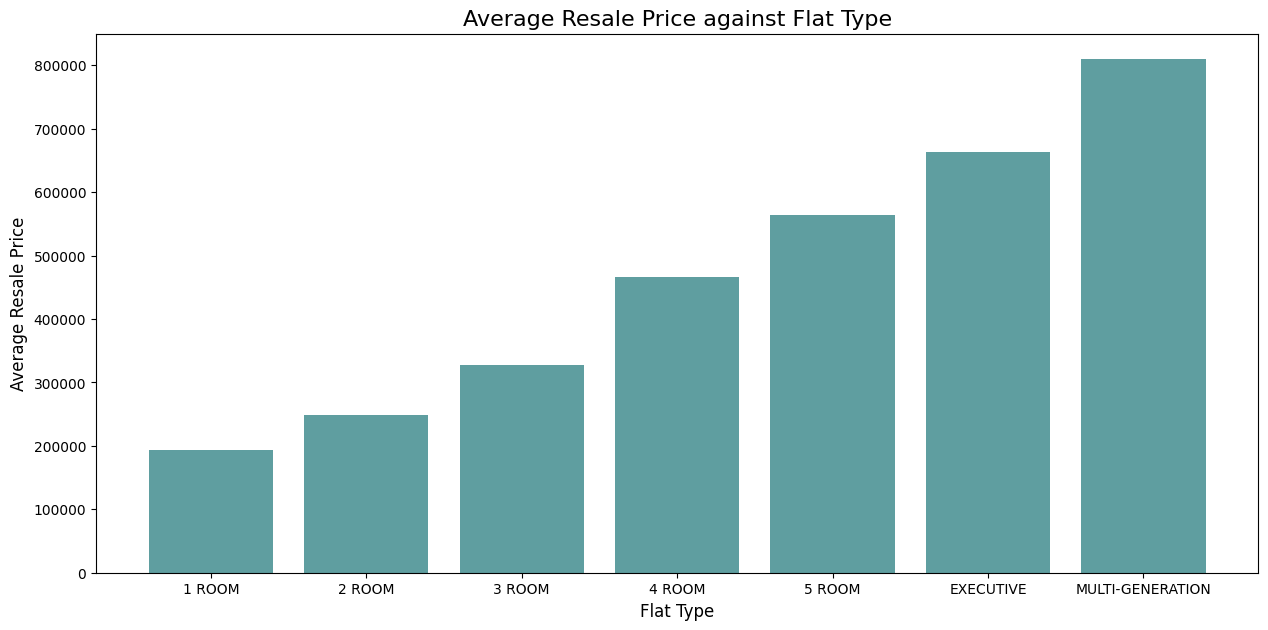

In [11]:
flat_type_labels = sorted(df["flat_type"].unique().tolist())
flat_type_count = []
flat_type_price = []

for type in flat_type_labels:
  cond = (df["flat_type"] == type)
  flat_type_count.append(len(df[cond]))
  flat_type_price.append(sum(df[cond]['resale_price']) / df[cond].shape[0])

plt.figure(figsize = (15, 7))
plt.bar(flat_type_labels, flat_type_price, color = "cadetblue")
plt.title("Average Resale Price against Flat Type", fontsize = 16) 
plt.xlabel("Flat Type", fontsize = 12)
plt.ylabel("Average Resale Price", fontsize = 12)
plt.show()

The greater the flat size, the higher the average resale prices

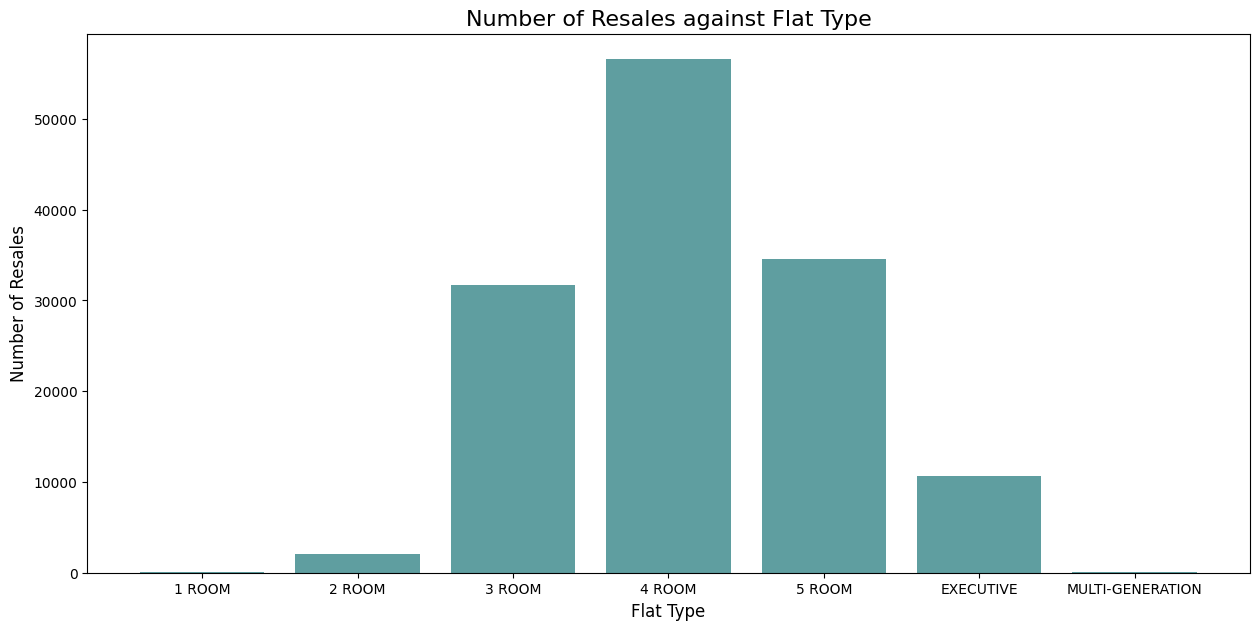

In [27]:
flat_type_labels = sorted(df["flat_type"].unique().tolist())
flat_type_count = []
flat_type_price = []

for type in flat_type_labels:
  cond = (df["flat_type"] == type)
  flat_type_count.append(len(df[cond]))
  flat_type_price.append(sum(df[cond]['resale_price']) / df[cond].shape[0])

plt.figure(figsize = (15, 7))
plt.bar(flat_type_labels, flat_type_count, color = "cadetblue")
plt.title("Number of Resales against Flat Type", fontsize = 16) 
plt.xlabel("Flat Type", fontsize = 12)
plt.ylabel("Number of Resales", fontsize = 12)
plt.show()

From the graph, it is clear that 4-room flats have the most number of sales, 
which is the most common type of flats in Singapore.

In [19]:
# changing remaining_lease to numeric
lease = df["remaining_lease"].str.split(" ", expand=True)
lease[2] = lease[2].fillna(0)
lease[0] = pd.to_numeric(lease[0])
lease[2] = pd.to_numeric(lease[2])
lease[0] = lease[0]*12 + lease[2]
lease = lease.rename(columns={0:"remaining_lease"})
df["remaining_lease"] = lease["remaining_lease"]

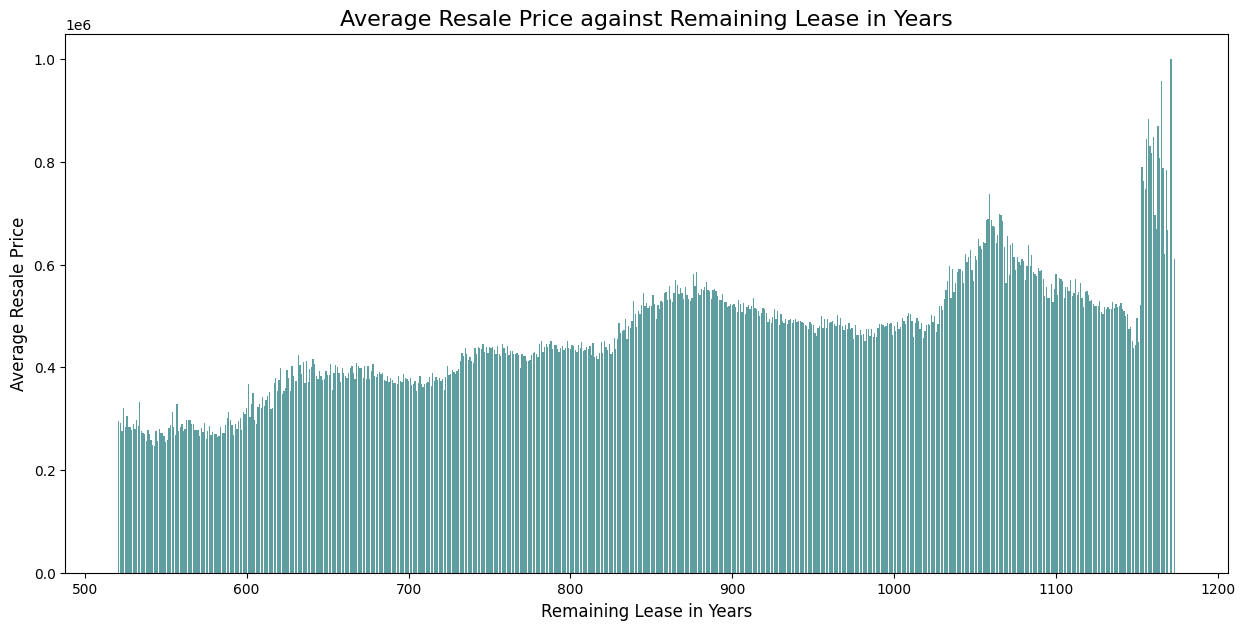

In [28]:
remaining_lease_labels = sorted(df["remaining_lease"].unique().tolist())
remaining_lease_price = []

for year in remaining_lease_labels:
  cond = (df["remaining_lease"] == year)
  remaining_lease_price.append(sum(df[cond]['resale_price']) / df[cond].shape[0])

plt.figure(figsize = (15, 7))
plt.bar(remaining_lease_labels, remaining_lease_price, color = "cadetblue")
plt.title("Average Resale Price against Remaining Lease in Years", fontsize = 16) 
plt.xlabel("Remaining Lease in Years", fontsize = 12)
plt.ylabel("Average Resale Price", fontsize = 12)
plt.show()

In general, there is an increasing trend where the greater the remaing lease, the higher the average resale price. 
The fluctuation may be due to the different types of flats having different resale prices. 

##Data processing

In [ ]:
'''
Transforming the data
- One hot encode flat_type, flat_model, town, storey_range to numeric
- Change remaining_lease into numeric in years
- Keep town, flat_type, storey_range, floor_area_sqm, flat_model, remaining_lease, resale_price(y data)
'''

In [ ]:
# dropping columns that will not be used
df_copy = df.copy(deep=True)
Y = df_copy["resale_price"]
X = df_copy.drop(columns=['month', 'block', 'resale_price', 'street_name'])

In [ ]:
Y

0         232000.0
1         250000.0
2         262000.0
3         265000.0
4         265000.0
            ...   
135563    735000.0
135564    738000.0
135565    920000.0
135566    798000.0
135567    818000.0
Name: resale_price, Length: 135568, dtype: float64

##Training model

In [ ]:
# Train test split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
# get list of all categorical variables
categorical_variables = []

for column in X.columns:
    if X[column].dtype == "object":
        categorical_variables.append(column)

print("Categorical variables: ", categorical_variables)

# One-hot encoding, fitted on the train dataset
enc_lr = OneHotEncoder(drop="first", sparse=False, handle_unknown="ignore")

transformer_lr = ColumnTransformer([
    ("categorical", enc_lr, categorical_variables)
], remainder="passthrough")


transformer_lr.fit(X_train)

# Transform X
X_train_encoded_lr = pd.DataFrame(transformer_lr.transform(X_train), columns=transformer_lr.get_feature_names_out())
X_test_encoded_lr = pd.DataFrame(transformer_lr.transform(X_test), columns=transformer_lr.get_feature_names_out())

Categorical variables:  ['town', 'flat_type', 'storey_range', 'flat_model']


In [ ]:
lr = LinearRegression()

lr.fit(X_train_encoded_lr, Y_train)

LinearRegression()

##Cross validation

In [ ]:
def get_CV_results(model, X, y, cv=10):
    scores = cross_validate(model, X, y, cv=cv, return_train_score=True)
    print(f"Mean Test Score: {scores['test_score'].mean()}")
    print("\n")

    display(pd.DataFrame(scores)) 

In [ ]:
get_CV_results(lr, X_train_encoded_lr, Y_train)

Mean Test Score: 0.8580917950402787




,fit_time,score_time,test_score,train_score
0,0.532698,0.008607,0.858513,0.858328
1,0.524489,0.005262,0.861419,0.857990
2,0.513444,0.013756,0.851626,0.859081
3,0.515373,0.005170,0.862735,0.857859
4,0.532799,0.015429,0.858058,0.858380
5,0.529176,0.013070,0.855292,0.858678
6,0.540070,0.007482,0.858573,0.858317
7,0.535681,0.011650,0.857861,0.858402
8,0.530107,0.005220,0.859767,0.858192
9,0.515875,0.007077,0.857075,0.858485


##Test set result

In [ ]:
def get_results(model, X, y):
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    mae = mean_absolute_error(y, y_pred)

    print(f"R2: {r2}")
    print(f"MSE: {mse}")
    print(f"RMSE: {mse**0.5}")
    print(f"MAE: {mae}")

In [ ]:
get_results(lr, X_test_encoded_lr, Y_test)

R2: 0.8593542561460921
MSE: 3801880084.729468
RMSE: 61659.38764478178
MAE: 48161.889883722215


In [ ]:
RMSE = 61659.38764478178
max = df['resale_price'].max()
min = df['resale_price'].min()
normalised_RMSE = RMSE/(max-min)
normalised_RMSE

0.04824678219466493

In [ ]:
X_train

,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease
114733,BUKIT PANJANG,EXECUTIVE,04 TO 06,144.0,Apartment,1987,64.833333
39458,HOUGANG,EXECUTIVE,01 TO 03,144.0,Apartment,1992,72.916667
81910,QUEENSTOWN,5 ROOM,28 TO 30,104.0,Premium Apartment,2016,94.916667
36480,TOA PAYOH,4 ROOM,07 TO 09,102.0,Model A,1984,64.500000
126724,PUNGGOL,4 ROOM,07 TO 09,92.0,Premium Apartment,2017,94.083333
...,...,...,...,...,...,...,...
110268,JURONG WEST,5 ROOM,04 TO 06,110.0,Improved,2001,78.416667
119879,JURONG WEST,3 ROOM,04 TO 06,82.0,New Generation,1985,62.916667
103694,WOODLANDS,4 ROOM,04 TO 06,101.0,Model A,1998,76.333333
131932,WOODLANDS,4 ROOM,10 TO 12,94.0,Premium Apartment,2003,79.666667


##Model interpretation

In [ ]:
ols = sm.OLS(Y_train.reset_index(drop=True), sm.add_constant(X_train_encoded_lr))

ols_res = ols.fit()

print(ols_res.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:           resale_price   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     9519.
Date:                Wed, 28 Sep 2022   Prob (F-statistic):               0.00
Time:                        07:47:16   Log-Likelihood:            -1.3496e+06
No. Observations:              108454   AIC:                         2.699e+06
Df Residuals:                  108384   BIC:                         2.700e+06
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

##Conclusion

- R2 value tells us how well the data fits our regression model, with 1 being the best value
- RMSE tells us the average distance between the predicted values and the actual values. 
- In this case, RMSE is normalised to scale it according to the prices. The closer to 0 it is, the better fitting our model is
- Coef shows us how much the resale price will change when there is a change in a unit of the X variable
- P-value tells us if the X variable is significant at determining the resale price, so only variables with P-values of under 0.05 will be considered significant

Normalised RMSE is 0.04824678219466493, which is below 0.1 and thus the model is well fitting.